# Missing data and aggregations

- In the real world there will be missing data and unwanted disturbance data

"Shit in gives shit out"

In [16]:
# Setup
# Create some dummy data which is faulty
import numpy as np
import pandas as pd

# Random data with a certain seed (more comparable)
np.random.seed(42)
N = 10
# Create a matrix filled with random numbers - this is an np.array so works as
# a matrix in eg matlab...
random_matrix = np.random.randint(1,10, [N,N]) 

# Add some faulty data, eg NaN at random indeces
# This takes random numbers within the size of randommatrix
# , 10 of these
# , and does not take a number more than once (replace=false)
index = np.random.choice(random_matrix.size, 10, replace=False)

# To be able to add None we need to change the type of the random matrix to floats
random_matrix = random_matrix.astype(float)

# Change the 2D-matrix to a 1D-matrix and add None (NaN) at these random positions
random_matrix.ravel()[index] = None

print(random_matrix)



[[ 7.  4.  8.  5.  7.  3. nan  8.  5. nan]
 [ 8.  8.  3.  6.  5.  2.  8. nan  2.  5.]
 [nan  6.  9.  1.  3.  7.  4.  9.  3.  5.]
 [ 3.  7.  5. nan  7.  2.  4.  9.  2. nan]
 [ 5.  2.  4.  7.  8.  3.  1.  4.  2.  8.]
 [ 4.  2.  6.  6.  4.  6.  2.  2.  4.  8.]
 [ 7.  9.  8.  5.  2.  5.  8.  9. nan  1.]
 [ 9.  7.  9.  8.  1.  8.  8.  3.  1.  8.]
 [ 3.  3.  1.  5. nan nan  7.  9.  8.  2.]
 [ 1.  7. nan  8.  5.  3.  8.  6.  3.  1.]]


In [20]:
# Create a dataframe from our data

# It's just to add the np.array into dataframe, no problem.
# Dataframe handles, "list like" (ie lists and arrays), dataframe, and dicts

# Also add a new index, default goes from 0 to N-1, we want to go "Player 1" to N
# Done with index = blabla

# Add column names, done with columns= blabla

dfscores = pd.DataFrame(random_matrix, 
    index=[f"Player {i}" for i in range(1,N+1)],
    columns=[f"Round {i}" for i in range(1,N+1)]
    )

# So now we have our data, and we see that there are missing data.

dfscores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10
Player 1,7.0,4.0,8.0,5.0,7.0,3.0,NaN,8.0,5.0,NaN
Player 2,8.0,8.0,3.0,6.0,5.0,2.0,8.0,NaN,2.0,5.0
Player 3,NaN,6.0,9.0,1.0,3.0,7.0,4.0,9.0,3.0,5.0
Player 4,3.0,7.0,5.0,NaN,7.0,2.0,4.0,9.0,2.0,NaN
Player 5,5.0,2.0,4.0,7.0,8.0,3.0,1.0,4.0,2.0,8.0
Player 6,4.0,2.0,6.0,6.0,4.0,6.0,2.0,2.0,4.0,8.0
Player 7,7.0,9.0,8.0,5.0,2.0,5.0,8.0,9.0,NaN,1.0
Player 8,9.0,7.0,9.0,8.0,1.0,8.0,8.0,3.0,1.0,8.0
Player 9,3.0,3.0,1.0,5.0,NaN,NaN,7.0,9.0,8.0,2.0
Player 10,1.0,7.0,NaN,8.0,5.0,3.0,8.0,6.0,3.0,1.0


In [21]:
dfscores.info() 
# Shows that we have 9-non-null on most, one column with 10 data, and one with 8.
# We need to handle this.

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Player 1 to Player 10
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Round 1   9 non-null      float64
 1   Round 2   10 non-null     float64
 2   Round 3   9 non-null      float64
 3   Round 4   9 non-null      float64
 4   Round 5   9 non-null      float64
 5   Round 6   9 non-null      float64
 6   Round 7   9 non-null      float64
 7   Round 8   9 non-null      float64
 8   Round 9   9 non-null      float64
 9   Round 10  8 non-null      float64
dtypes: float64(10)
memory usage: 880.0+ bytes


## Handling missing data

There are different types of missing data: NaN, Na, Null etc. We look at NaN here.

How to find these:

- isnull() : returns True if null
- notnull() : returns True if number
- dropna() : drops an axis with nulls, default removes rows (change with axis=).
- fillna() : fills Null values with certain value.

How to treat a NaN? Depends on the situation. Talk with the domain expert.

In [33]:
# Test different tools
dfscores.isnull()
dfscores.notnull()
dfscores.dropna()
dfscores.dropna(axis="columns")

# Why are there NaN? In a game:
# could that someone forgot to write your scores
# could be that you didn't participate
# could be any reason.
# Here we change it to 0, these are scores so NaN are just no scores.
dfscores.fillna(0)



,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10
Player 1,7.0,4.0,8.0,5.0,7.0,3.0,0.0,8.0,5.0,0.0
Player 2,8.0,8.0,3.0,6.0,5.0,2.0,8.0,0.0,2.0,5.0
Player 3,0.0,6.0,9.0,1.0,3.0,7.0,4.0,9.0,3.0,5.0
Player 4,3.0,7.0,5.0,0.0,7.0,2.0,4.0,9.0,2.0,0.0
Player 5,5.0,2.0,4.0,7.0,8.0,3.0,1.0,4.0,2.0,8.0
Player 6,4.0,2.0,6.0,6.0,4.0,6.0,2.0,2.0,4.0,8.0
Player 7,7.0,9.0,8.0,5.0,2.0,5.0,8.0,9.0,0.0,1.0
Player 8,9.0,7.0,9.0,8.0,1.0,8.0,8.0,3.0,1.0,8.0
Player 9,3.0,3.0,1.0,5.0,0.0,0.0,7.0,9.0,8.0,2.0
Player 10,1.0,7.0,0.0,8.0,5.0,3.0,8.0,6.0,3.0,1.0


## Missing value strategy

Depends on:
- Data set size: Small data set, each NaN is important, handle with care. In large data set with a low number of NaN, usually not important so remove these (drop these).
- Valuable information: some rows/columns can be extra important and can't be dropped. Handle with care.
- Domain knowledge: You may not have expert knowledge, talk with someone who does. Check that it's e.g. ok to drop some data.

Missing values can impact:
- Data visualisation.
- Arithmetic computations.
- Summary statistics.
- Machine learning algorithms.


In [43]:
import seaborn as sns

# Load included data from an online repository
# Check online what data there are online to play around with.
# (planets.csv for example)
titanic = sns.load_dataset('titanic')

# Titanic includes data on passengers on Titanic

# Explore data
titanic.head()
titanic.isnull().sum() # Shows the number of NaN per column!

# WE're focusing on age here. 177 nulls here.




survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

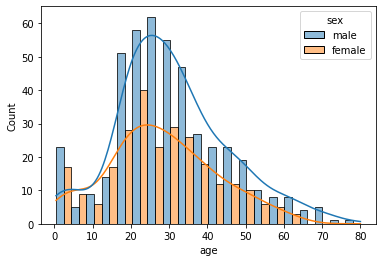

In [55]:
# Check the statistics on the age

# histplot, histogram, of column x, kde gives a distribution approximation.
#sns.histplot(data=titanic, x="age", kde=True)
# hue gives colours for the different parameters, here we chose the gender.
sns.histplot(data=titanic, x="age", kde=True, hue="sex", multiple="dodge");


What now? How to handle NaNs of ages. Let's assume that we have talked to a historian.

They say: use median age of corresponding gender to fill in the NaN of the ages.

In [65]:
# To extract ages of one gender
#titanic["sex"] == "male"

# So we get
# Number of males
print(f'Number of males: {sum(titanic["sex"] == "male")}')
# Number of women
print(f'Number of females: {sum(titanic["sex"] == "female")}')

# Extract only male data
#titanic[titanic["sex"] == "male"]
# Now we want only the age data of this: use loc!
#titanic.loc[titanic["sex"] == "male", "age"]
# Take median of this!
median_male_age = titanic.loc[titanic["sex"] == "male", "age"].median()
median_female_age = titanic.loc[titanic["sex"] == "female", "age"].median()
print(f"Median male age: {median_male_age}, median female age: {median_female_age}")

# So the historian said, replace NaN with median ages


Number of males: 577
Number of females: 314
Median male age: 29.0, median female age: 27.0


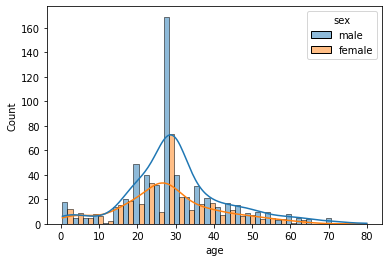

In [68]:
# So the historian said, replace NaN with median ages

titanic.loc[titanic["sex"] == "male", "age"] = \
    titanic.loc[titanic["sex"] == "male", "age"].fillna(median_male_age)

titanic.loc[titanic["sex"] == "female", "age"] = \
    titanic.loc[titanic["sex"] == "female", "age"].fillna(median_female_age)



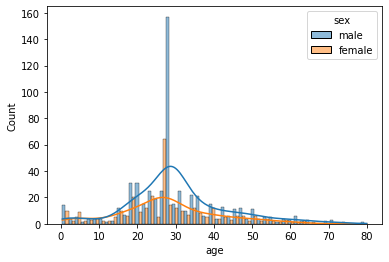

In [72]:
titanic.isnull().sum()
# Now we have zero nulls for age-column.
titanic.loc[titanic["age"] == median_female_age, "sex"].value_counts()

sns.histplot(data=titanic, x="age", kde=True, hue="sex", multiple="dodge", bins=50);

# So here we see that, hm, perhaps this was not the best way to do this...


In [86]:
# Another tool, groupby
# eg shows the mean value of each column for males and females
#titanic.groupby("sex").mean()
# and extract survive and age columns (must be a list in a list)
titanic.groupby("sex").mean()[["survived", "age"]]
# Or average survival rate vs class.
titanic.groupby("pclass").mean()[["survived"]]
#
titanic.groupby("sex").mean()[["survived"]]


,survived
deck,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
